In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string, os
import nltk
import re
import keras
import random
import io
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adamax
import sys
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image, ImageDraw, ImageFont
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("../LyricsGenerator/Songs.csv")
data.head(10)

,Artist,Title,Lyrics
0,Taylor Swift,cardigan,"Vintage tee, brand new phone\nHigh heels on co..."
1,Taylor Swift,exile,"I can see you standing, honey\nWith his arms a..."
2,Taylor Swift,Lover,We could leave the Christmas lights up 'til Ja...
3,Taylor Swift,the 1,"I'm doing good, I'm on some new shit\nBeen say..."
4,Taylor Swift,Look What You Made Me Do,I don't like your little games\nDon't like you...
5,Taylor Swift,betty,"Betty, I won't make assumptions\nAbout why you..."
6,Taylor Swift,august,"Salt air, and the rust on your door\nI never n..."
7,Taylor Swift,End Game,I wanna be your end game\nI wanna be your firs...
8,Taylor Swift,You Need To Calm Down,You are somebody that I don't know\nBut you're...
9,Taylor Swift,ME!,I promise that you'll never find another like ...


In [3]:
print("Artists in the data:\n",data.Artist.value_counts()) 


Artists in the data:
 Artist
Taylor Swift          50
David Bowie           50
Billy Joel            50
Eric Clapton          50
Billie Eilish         50
Leonard Cohen         50
Bruce Springsteen     40
The Beatles           35
Ray LaMontagne        30
Elton John            30
Queen                 30
Frank Sinatra         30
John Denver           30
Bryan Adams           30
​twenty one pilots    30
Nat King Cole         30
Lana Del Rey          30
Vance Joy             30
George Michael        30
Bob Dylan             20
Ed Sheeran            20
Name: count, dtype: int64


In [4]:
print("Size of Dataset:", data.shape)


Size of Dataset: (745, 3)


In [5]:
data["No_of_Characters"] = data["Lyrics"].apply(len)
data["No_of_Words"]=data.apply(lambda row: nltk.word_tokenize(row["Lyrics"]), axis=1).apply(len)
data["No_of_Lines"] = data["Lyrics"].str.split('\n').apply(len)
data.describe()


,No_of_Characters,No_of_Words,No_of_Lines
count,745.000000,745.000000,745.000000
mean,1403.347651,319.400000,46.277852
std,666.721467,156.163646,21.180531
min,1.000000,1.000000,1.000000
25%,946.000000,215.000000,33.000000
50%,1289.000000,291.000000,44.000000
75%,1714.000000,389.000000,56.000000
max,7267.000000,1652.000000,224.000000


<Figure size 1500x1500 with 0 Axes>

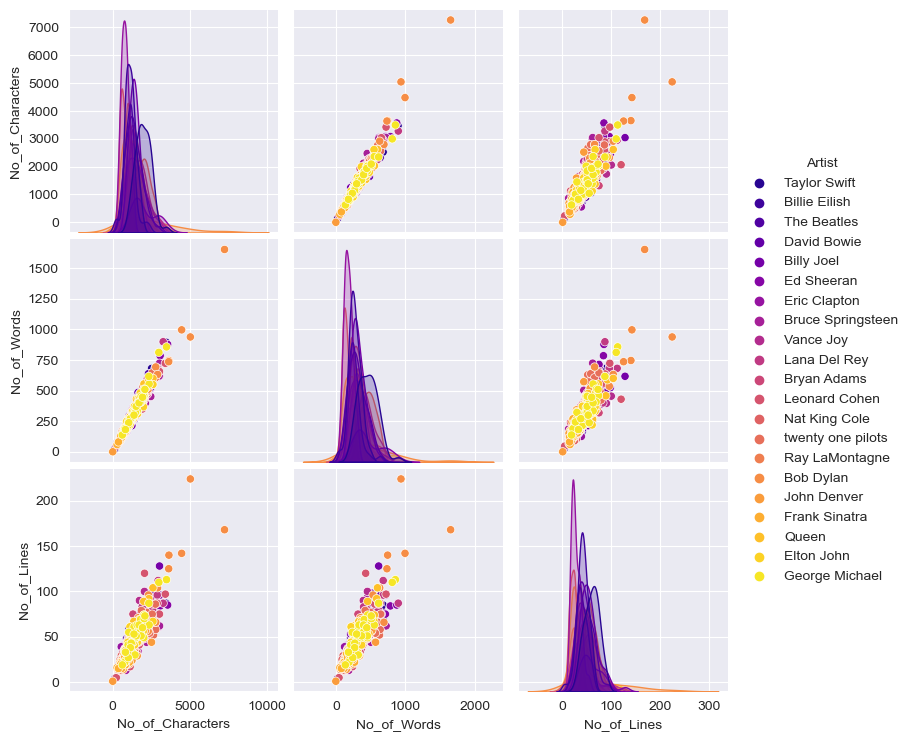

In [6]:
#Plotting the comparative song lengths for various artists
plt.figure(figsize=(15,15))
ax = sns.pairplot(data, hue="Artist", palette="plasma")


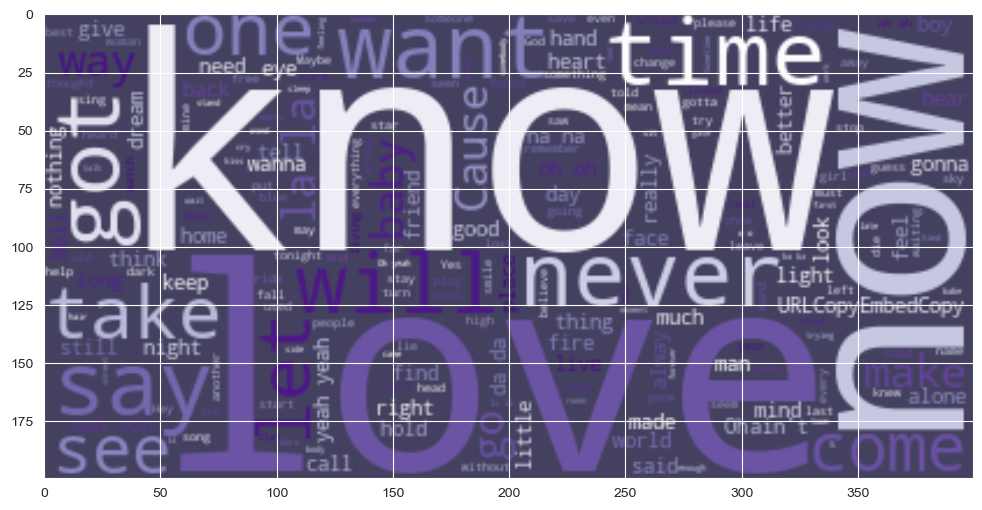

In [7]:
# Generate a word cloud image
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="#444160",colormap="Purples", max_words=800).generate(" ".join(data["Lyrics"]))
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

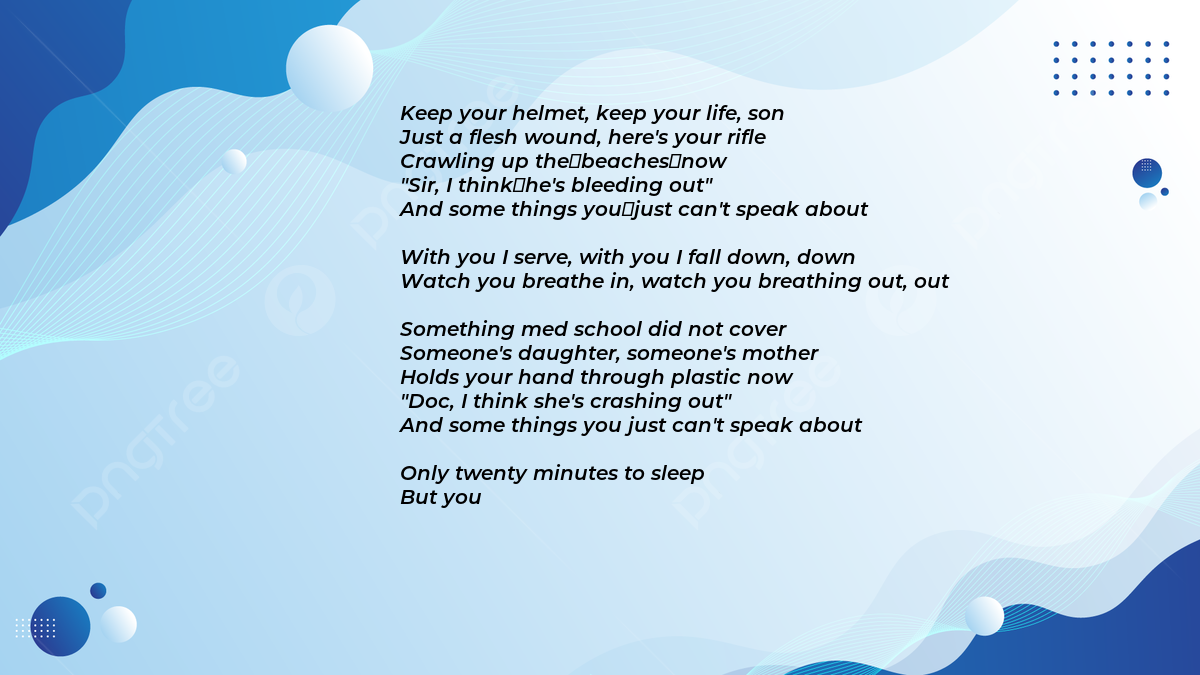

In [8]:
#A function to disply the song in an asthetically pleasing way! lol
def My_song(song):
    img = Image.open("../LyricsGenerator/pngtree-background-biru-keren-dan-kosong-abstract-untuk-template-desain-powerpoint-ppt-picture-image_1738466.jpg")
    Text_on_image = ImageDraw.Draw(img)
    myFont = ImageFont.truetype("../LyricsGenerator/Montserrat-SemiBoldItalic.otf", 20)
    Text_on_image.text((400,100), song, font=myFont, fill =(0, 0, 0))
    return img    
#Having a look at the first 500 charachters of a random song lyrics
My_song(data.Lyrics[42][:500])

In [9]:
#Lining up all the lyrics to create corpus
Corpus =''
for listitem in data.Lyrics:
    Corpus += listitem
    
Corpus = Corpus.lower()

# แสดงจำนวนตัวอักษรที่ไม่ซ้ำกันใน Corpus
print("Number of unique characters:", len(set(Corpus)))

Number of unique characters: 92


In [10]:
print("The unique characters:",sorted(set(Corpus)))


The unique characters: ['\n', ' ', '!', '"', '&', "'", '(', ')', '*', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '>', '?', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '}', '~', '©', 'à', 'á', 'ã', 'ä', 'ç', 'è', 'é', 'ê', 'ë', 'í', 'ñ', 'ó', 'ö', 'ü', 'ŏ', 'е', 'ا', 'س', 'ل', 'م', 'و', '\u2005', '\u200a', '\u200b', '–', '—', '‘', '’', '‚', '“', '”', '…', '\u205f', '\ufeff']


In [11]:
#clean the unique by using NLP
to_remove = ['{', '}', '~', '©', 'à', 'á', 'ã', 'ä', 'ç', 'è', 'é', 'ê', 'ë', 'í', 'ñ', 'ó', 'ö', 'ü', 'ŏ',
             'е', 'ا', 'س', 'ل', 'م', 'و', '\u2005', '\u200a', '\u200b', '–', '—', '‘', '’', '‚', '“', '”', 
             '…', '\u205f', '\ufeff', '!', '&', '(', ')', '*', '-',  '/', ]
for symbol in to_remove:
    Corpus = Corpus.replace(symbol," ")

    #Corpus = re.sub("[^A-Za-z0-9'\.\n]","",Corpus)


In [12]:
print("The unique characters:",sorted(set(Corpus)))


The unique characters: ['\n', ' ', '"', "'", ',', '.', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '>', '?', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [13]:
# Storing all the unique characters present in my corpus to bult a mapping dic. 
symb = sorted(list(set(Corpus)))

L_corpus = len(Corpus) #length of corpus
L_symb = len(symb) #length of total unique characters

#Building dictionary to access the vocabulary from indices and vice versa
mapping = dict((c, i) for i, c in enumerate(symb))
reverse_mapping = dict((i, c) for i, c in enumerate(symb))

print("Total number of characters:", L_corpus)
print("Number of unique characters:", L_symb)

Total number of characters: 1045494
Number of unique characters: 47


In [14]:
#Splitting the Corpus in equal length of strings and output target
length = 40
features = []
targets = []
for i in range(0, L_corpus - length, 1):
    feature = Corpus[i:i + length]
    target = Corpus[i + length]
    features.append([mapping[j] for j in feature])
    targets.append(mapping[target])
    
    
L_datapoints = len(targets)
print("Total number of sequences in the Corpus:", L_datapoints)


Total number of sequences in the Corpus: 1045454


In [15]:
# ปรับรูปร่างของ features ใหม่
X = (np.reshape(features, (L_datapoints, length, 1)))/ float(L_symb)

# หาจำนวน classes โดยการหาค่ามากสุดใน targets แล้วเพิ่ม 1
num_classes = np.max(targets) + 1

# ทำการ one-hot encode ให้กับตัวแปร output
y = np.eye(num_classes)[targets]


In [16]:
#Initialising the Model
model = Sequential()
#Adding layers
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(y.shape[1], activation='softmax'))
#Compiling the model for training  
opt = Adamax(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt)

#Model's Summary               
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dense (Dense)               (None, 47)                12079     
                                                                 
Total params: 276271 (1.05 MB)
Trainable params: 276271 (1.05 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
history = model.fit(X, y, batch_size=128, epochs=100)

Epoch 1/100
8168/8168 [==============================] - 702s 86ms/step - loss: 2.5705
Epoch 2/100
8168/8168 [==============================] - 784s 96ms/step - loss: 2.2512
Epoch 3/100
8168/8168 [==============================] - 826s 101ms/step - loss: 2.0752
Epoch 4/100
8168/8168 [==============================] - 856s 105ms/step - loss: 1.9703
Epoch 5/100
8168/8168 [==============================] - 840s 103ms/step - loss: 1.8988
Epoch 6/100
8168/8168 [==============================] - 836s 102ms/step - loss: 1.8550
Epoch 7/100
8168/8168 [==============================] - 832s 102ms/step - loss: 1.8064
Epoch 8/100
8168/8168 [==============================] - 730s 89ms/step - loss: 1.7826
Epoch 9/100
8168/8168 [==============================] - 799s 98ms/step - loss: 1.7478
Epoch 10/100
8168/8168 [==============================] - 889s 109ms/step - loss: 1.7087
Epoch 11/100
8168/8168 [==============================] - 876s 107ms/step - loss: 1.6909
Epoch 12/100
8168/8168 [==========

In [1]:
history_df = pd.DataFrame(history.history)
#Plotting the learnings 

fig = plt.figure(figsize=(15,4), facecolor="#B291B6")
fig.suptitle("Learning Plot of Model for Loss")
pl=sns.lineplot(data=history_df["loss"],color="#444160")
pl.set(ylabel ="Training Loss")
pl.set(xlabel ="Epochs")

NameError: name 'pd' is not defined

In [13]:
def Lyrics_Generator(starter,Ch_count): #,temperature=1.0):
    generated= ""
    starter = starter 
    seed=[mapping[char] for char in starter]
    generated += starter 
    # Generating new text of given length
    for i in range(Ch_count):
        seed=[mapping[char] for char in starter]
        x_pred = np.reshape(seed, (1, len(seed), 1))
        x_pred = x_pred/ float(L_symb)
        prediction = model.predict(x_pred, verbose=0)[0]  
        # Getting the index of the next most probable index
        prediction = np.asarray(prediction).astype('float64')
        prediction = np.log(prediction) / 1.0 
        exp_preds = np.exp(prediction)
        prediction = exp_preds / np.sum(exp_preds)
        probas = np.random.multinomial(1, prediction, 1)
        index = np.argmax(prediction)
        next_char = reverse_mapping[index]  
        # Generating new text
        generated += next_char
        starter = starter[1:] + next_char
       
    return generated

In [17]:
starter_text = "run"
Ch_count = 400
song_1 = Lyrics_Generator(starter_text, Ch_count)
#Let's have a look at the song
My_song(song_1)
print(song_1)

runllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllll


In [26]:
import pickle

with open("model.pkl", "wb") as output:
    pickle.dump(model, output)